Episode 1/10 - Score: 20240.0
Episode 2/10 - Score: 20128.0
Episode 3/10 - Score: 16396.0
Episode 4/10 - Score: 20232.0
Episode 5/10 - Score: 20224.0
Episode 6/10 - Score: 20164.0
Episode 7/10 - Score: 16268.0
Episode 8/10 - Score: 20212.0
Episode 9/10 - Score: 20220.0
Episode 10/10 - Score: 20176.0


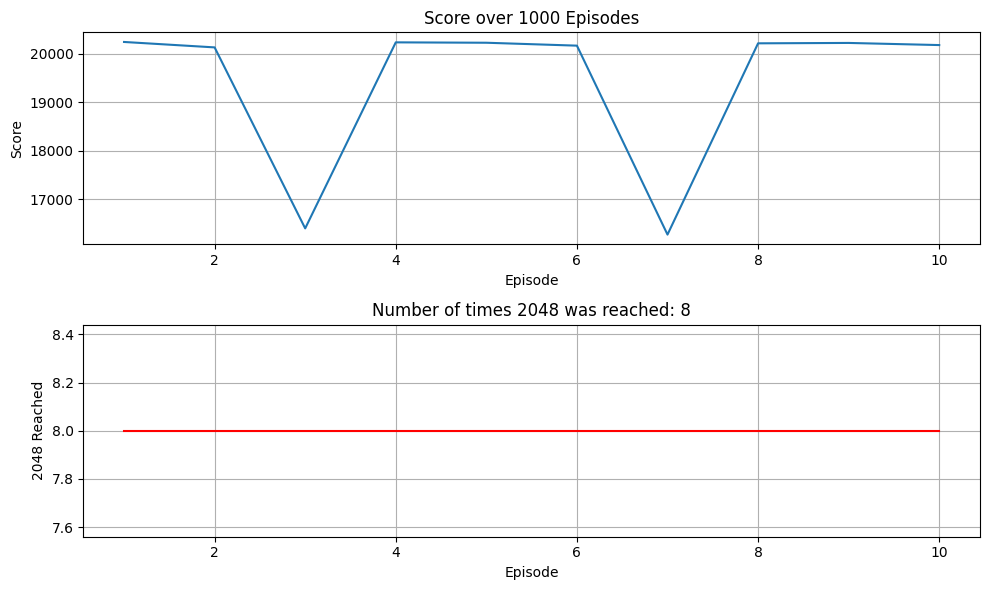

In [4]:
#MONTE CARLO SEARCH TREE

import gym
import gym_2048
import numpy as np
import copy
import matplotlib.pyplot as plt

# Hiperparametrii
SIMULATIONS_PER_ACTION = 50
TIME_ONE_MOVE = 0.2
DISCOUNT_FACTOR = 0.99 

def run_simulation(env, action):
    #Ruleaza o simulare a jocului pornind de la o actiune data
    sim_env = copy.deepcopy(env)
    observation, reward, terminated, info = sim_env.step(action)
    total_reward = reward
    discount = DISCOUNT_FACTOR

    while not terminated:
        #Alegem urmatoarea mutare random
        next_action = sim_env.action_space.sample()
        observation, reward, terminated, info = sim_env.step(next_action)
        total_reward += reward * discount
        discount *= DISCOUNT_FACTOR

    return total_reward


def monte_carlo_action(env):
    #folosim monte carlo pentru a alege cea mai buna actiune prin simularea mai multor jocuri si alegerea actiunii cu cea mai mare recompensa medie
    action_rewards = []
    for action in range(env.action_space.n):
        action_total_reward = 0
        for _ in range(SIMULATIONS_PER_ACTION):
            action_total_reward += run_simulation(env, action)
        action_rewards.append(action_total_reward / SIMULATIONS_PER_ACTION)
    return np.argmax(action_rewards)


def play_2048_with_monte_carlo(episodes=1000):
    #Simulam jocul de cateva ori pentru a vedea cat de bine se descurca algoritmul
    scores = []
    reached_2048_count = 0

    for episode in range(episodes):
        env = gym.make("2048-v0")
        env.reset()
        total_score = 0
        terminated = False

        while not terminated:
            action = monte_carlo_action(env)
            observation, reward, terminated, info = env.step(action)
            total_score += reward
            if info['highest'] == 2048:
                reached_2048_count += 1
                break

        scores.append(total_score)
        print(f"Episode {episode + 1}/{episodes} - Score: {total_score}")

    # Afisarea rezulatelor sub forma de grafic
    plt.figure(figsize=(10, 6))

    # Numarul de puncte obtinute la fiecare episod
    plt.subplot(2, 1, 1)
    plt.plot(range(1, episodes + 1), scores, label="Score per episode")
    plt.xlabel("Episode")
    plt.ylabel("Score")
    plt.title("Score over 1000 Episodes")
    plt.grid(True)

    # Afisam numarul de ori cand s-a ajuns la 2048
    plt.subplot(2, 1, 2)
    plt.plot(range(1, episodes + 1), [reached_2048_count] * episodes, label="2048 Reached", color='r')
    plt.xlabel("Episode")
    plt.ylabel("2048 Reached")
    plt.title(f"Number of times 2048 was reached: {reached_2048_count}")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    play_2048_with_monte_carlo(episodes=10)


d:\Program Files\anaconda3\envs\RL\Lib\site-packages\gym\utils\passive_env_checker.py:20: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: int32. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
d:\Program Files\anaconda3\envs\RL\Lib\site-packages\gym\utils\passive_env_checker.py:25: UserWarning: WARN: It seems a Box observation space is an image but the upper and lower bounds are not in [0, 255]. Generally, CNN policies assume observations are within that range, so you may encounter an issue if the observation values are not.
  logger.warn(
d:\Program Files\anaconda3\envs\RL\Lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
d:\Program Files\anaconda3\env

Episode 0/1000
Episode 100/1000
Episode 200/1000
Episode 300/1000
Episode 400/1000
Episode 500/1000
Episode 600/1000
Episode 700/1000
Episode 800/1000
Episode 900/1000


d:\Program Files\anaconda3\envs\RL\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


Score: 0
Highest: 2
[[2 0 0 0]
 [0 0 0 0]
 [0 2 0 0]
 [0 0 0 0]]
Score: 0.0
Highest: 2
[[0 0 2 0]
 [0 0 0 0]
 [0 0 0 0]
 [2 2 0 0]]
Score: 0.0
Highest: 2
[[0 0 0 0]
 [0 0 2 0]
 [0 0 0 0]
 [2 2 2 0]]
Score: 4.0
Highest: 4
[[2 2 4 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 2 0 0]]
Score: 8.0
Highest: 4
[[0 0 0 0]
 [0 2 0 0]
 [0 0 0 0]
 [2 4 4 0]]
Score: 8.0
Highest: 4
[[0 0 0 0]
 [0 0 2 0]
 [0 2 0 0]
 [2 4 4 0]]
Score: 8.0
Highest: 4
[[0 0 0 0]
 [0 0 2 0]
 [0 2 2 0]
 [2 4 4 0]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [0 2 4 0]
 [2 4 4 2]]
Score: 20.0
Highest: 8
[[0 2 0 0]
 [0 0 0 0]
 [0 2 0 0]
 [2 4 8 2]]
Score: 24.0
Highest: 8
[[0 0 0 0]
 [0 0 0 0]
 [2 4 0 0]
 [2 4 8 2]]
Score: 36.0
Highest: 8
[[4 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [4 8 8 2]]
Score: 44.0
Highest: 8
[[2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [8 8 8 2]]
Score: 44.0
Highest: 8
[[2 0 0 0]
 [0 0 0 0]
 [2 0 0 0]
 [8 8 8 2]]
Score: 48.0
Highest: 8
[[0 0 0 0]
 [0 0 0 0]
 [4 0 2 0]
 [8 8 8 2]]
Score: 64.0
Highest: 16
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 

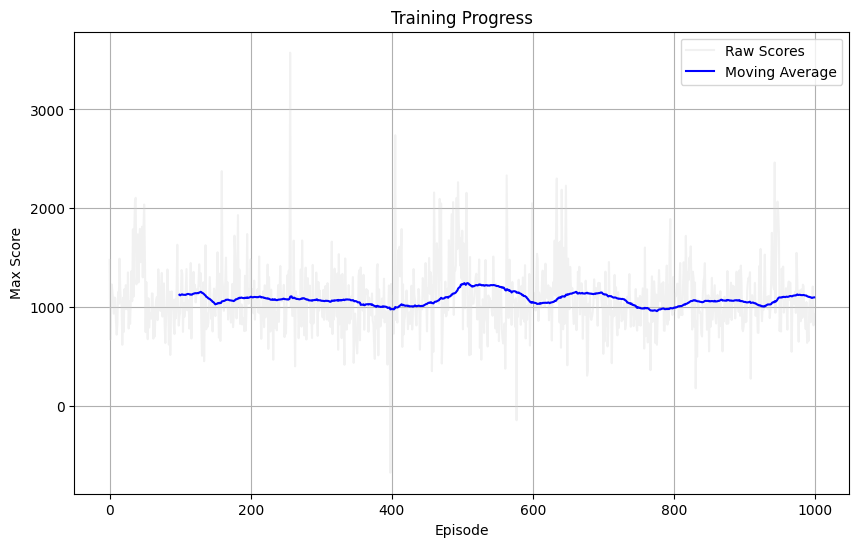

In [1]:
#MONTE CARLO POLICY EVALUATION

import gym
import gym_2048
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import copy 

class MonteCarloAgent:
    def __init__(self, env, epsilon=0.1, gamma=0.99, num_episodes=1000):
        self.env = env
        self.epsilon = epsilon
        self.gamma = gamma
        self.num_episodes = num_episodes
        self.Q = defaultdict(lambda: np.zeros(env.action_space.n, dtype=np.float32))
        self.max_returns_per_state = 100
        self.returns = defaultdict(list)
        self.max_scores = []
        self.previous_state = None

    def get_state_key(self, state):
        # Comprimam starea intr-un tuplu pentru a o folosi ca cheie in dictionar sa salvam spatiu
        # convertim valorile non-zero la logaritmul in baza 2
        state_log = np.zeros_like(state, dtype=np.int8)
        non_zero_mask = state > 0
        state_log[non_zero_mask] = np.log2(state[non_zero_mask]).astype(np.int8)
        return tuple(state_log.flatten())
    


    def epsilon_greedy_policy(self, state, valid_actions):
        #politica epsilon-greedy pentru a alege actiunea
        if not valid_actions:
            return None 
        state_key = self.get_state_key(state)
        
        # daca epsilon este mai mic decat un numar random, alegem o actiune random
        if np.random.random() < self.epsilon:
            return np.random.choice(valid_actions)
        
        # altfel, alegem actiunea cu valoarea Q maxima
        max_actions = np.flatnonzero(self.Q[state_key] == np.max(self.Q[state_key]))
        max_actions = [a for a in max_actions if a in valid_actions]
        
        if not max_actions:
            return np.random.choice(valid_actions)
        
        return np.random.choice(max_actions)

    def get_valid_actions(self):
        #preluam mutarile valide pentru starea curenta
        valid_actions = []
        for action in range(self.env.action_space.n):
            env_clone = copy.deepcopy(self.env)
            _, _, _, info = env_clone.step(action)
            if not info.get("illegal_move", False):
                valid_actions.append(action)
        return valid_actions


    def update_q_value(self, state_action, G, alpha=0.1):
        #actualizam valoarea Q pentru o pereche stare-actiune
        self.Q[state_action[0]][state_action[1]] += alpha * (G - self.Q[state_action[0]][state_action[1]])

           
    def decode_state(self, state):
        #convertim starea one-hot encodata in valorile tablei 2048
        board = np.zeros((4, 4), dtype=np.int32)
        for i in range(4):
            for j in range(4):
                nonzero_idx = np.nonzero(state[i, j])[0]
                if len(nonzero_idx) > 0:
                    board[i, j] = 2 ** (nonzero_idx[0] + 1) if nonzero_idx[0] > 0 else 0
        return board

    def calculate_custom_reward(self, state, next_state, env_reward, info):
        #calculam recompensa custom pentru o pereche stare-actiune 

        if info.get('illegal_move', False):
            return -10.0  # penalizare pentru mutare ilegala
            
        current_board = self.decode_state(state)
        next_board = self.decode_state(next_state)
        
        reward = 0.0
        
        # 1. Recompensam imbinarea celulelor
        if env_reward > 0:
            reward += env_reward * 0.1 
        
        # 2. Recompensam celula cu valoarea cea mai mare din coltul din stanga sus
        max_tile = np.max(next_board)
        if max_tile > 0:
            if next_board[0,0] == max_tile:
                reward += np.log2(max_tile) * 2.0
            elif next_board[0,1] == max_tile and max_tile >= 128:  # permitem si valori mai mici pentru coltul din stanga sus
                reward += np.log2(max_tile)
        
        # 3. Penalizare pentru pattern de valori crescatoare pe linii sau coloane
        for i in range(4):
            for j in range(3):
                # Check horizontal gradient
                if next_board[i,j] < next_board[i,j+1] and next_board[i,j] > 0:
                    reward -= np.log2(next_board[i,j+1]) * 0.5
                # Check vertical gradient
                if i < 3 and next_board[i,j] < next_board[i+1,j] and next_board[i,j] > 0:
                    reward -= np.log2(next_board[i+1,j]) * 0.5
        
        # 4. Recompensam viitoare posibile imbinari
        merger_bonus = 0
        for i in range(4):
            for j in range(3):
                # imbinari orizontale
                if next_board[i,j] == next_board[i,j+1] and next_board[i,j] > 0:
                    merger_bonus += np.log2(next_board[i,j])
                # imbinari verticale
                if i < 3 and next_board[i,j] == next_board[i+1,j] and next_board[i,j] > 0:
                    merger_bonus += np.log2(next_board[i,j])
        reward += merger_bonus * 0.3
        
        # 5. Recompensam celulele goale
        empty_cells = np.count_nonzero(next_board == 0)
        reward += empty_cells * 2.0 
        return reward

    def monte_carlo_policy_evaluation(self):
        for episode in range(self.num_episodes):
            if episode % 100 == 0:
                print(f"Episode {episode}/{self.num_episodes}")
            state = self.env.reset()
            self.previous_state = None
            done = False
            episode_data = []
            episode_score = 0

            while not done:
                valid_actions = self.get_valid_actions()
                if not valid_actions:
                    break
                
                action = self.epsilon_greedy_policy(state, valid_actions)
                next_state, env_reward, terminated, info = self.env.step(action)
                
                #calculam recompensa custom
                custom_reward = self.calculate_custom_reward(state, next_state, env_reward, info)
                episode_data.append((state, action, custom_reward))
                episode_score += custom_reward
                
                if terminated:
                    done = True
                else:
                    state = next_state
                    self.previous_state = state.copy()

            # updatam valorile Q pentru fiecare stare-actiune din episod
            G = 0
            visited_state_actions = set()
            # parcurgem in ordine inversa pentru a calcula G
            for t in reversed(range(len(episode_data))):
                state, action, reward = episode_data[t]
                G = self.gamma * G + reward
                state_key = self.get_state_key(state)
                if (state_key, action) not in visited_state_actions:
                    visited_state_actions.add((state_key, action))
                    self.update_q_value((state_key, action), G)

            self.max_scores.append(episode_score)
            episode_data.clear()

    def play(self, render=True):
        state = self.env.reset()
        done = False
        total_reward = 0
        
        while not done:
            if render:
                self.env.render()
        
            valid_actions = self.get_valid_actions()
            if not valid_actions:
                break  # iesim daca nu mai avem mutari 
            
            action = self.epsilon_greedy_policy(state, valid_actions)
            next_state, reward, terminated, info = self.env.step(action)
            total_reward += reward
            
            if terminated:
                done = True
            else:
                state = next_state

        print(f"Game Over! Score: {total_reward}")
        return total_reward


    def plot_max_scores(self, window_size=100):
        #afisam scorurile maxime obtinute la fiecare episod
        plt.figure(figsize=(10, 6))
        
        plt.plot(self.max_scores, 'lightgray', alpha=0.3, label='Raw Scores')
        
        # Calculam moving average
        if len(self.max_scores) >= window_size:
            moving_avg = np.convolve(self.max_scores, 
                                   np.ones(window_size)/window_size, 
                                   mode='valid')
            plt.plot(range(window_size-1, len(self.max_scores)), 
                    moving_avg, 
                    'b-', 
                    label=f'Moving Average')
        
        plt.xlabel('Episode')
        plt.ylabel('Max Score')
        plt.title('Training Progress')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    env = gym.make("2048-v0")
    agent = MonteCarloAgent(env, epsilon=0.1, gamma=0.99, num_episodes=1000)
    
    try:
        agent.monte_carlo_policy_evaluation()
        agent.play(render=True)
        agent.plot_max_scores(window_size=100) 
    finally:
        env.close()